<a href="https://colab.research.google.com/github/harishahamed26/Diabetes_Prediction_Using_Neural_Network/blob/main/DiabetesPredictionNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DiabetesPredictionNeuralNetwork

***Data Set Attribute Description***

• A1 - Number of times pregnant
--
• A2 - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
--
• A3 - Diastolic blood pressure (mm Hg)
--
• A4 - Triceps skin fold thickness (mm)
--
• A5 - 2-Hour serum insulin (mu U/ml)
--
• A6 - Body mass index (weight in kg/(height in m)^2)
--
• A7 - Diabetes pedigree function
--
• A8 - Age (years)
--


In [203]:
! pip install SMOTE


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [204]:
! pip install tensorflow # Necessary package

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [205]:
! pip install keras-tuner # Installing keras tuner to tune the hyperparameter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data loading & EDA


In [206]:
# Importing of necessary libraries 

import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import json
from sklearn.preprocessing import normalize
# install the Keras-tuner library

import kerastuner as kt

# set random seeds to get reproducible results
import os
seed = 100
os.environ['PYTHONHASHSEED']=str(seed) 
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow) 

RANDOM_SEED = 100

In [207]:
# Loading of Train Dataset and displaying the first 5 rows

df_Train = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/Diabetes_Prediction_Using_Neural_Network/main/data/train.csv')
df_Train.head(5)

,id,A1,A2,A3,A4,A5,A6,A7,A8,class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [208]:
df_Train.info() # Information about Train Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      668 non-null    int64  
 1   A1      668 non-null    int64  
 2   A2      668 non-null    int64  
 3   A3      668 non-null    int64  
 4   A4      668 non-null    int64  
 5   A5      668 non-null    int64  
 6   A6      668 non-null    float64
 7   A7      668 non-null    float64
 8   A8      668 non-null    int64  
 9   class   668 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 52.3 KB


In [209]:
df_Train.isna().sum() # Checking the null values

id       0
A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
class    0
dtype: int64

In [210]:
df_Train.describe() # Description Statistical Analysis

,id,A1,A2,A3,A4,A5,A6,A7,A8,class
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,334.500000,3.812874,120.405689,68.748503,20.567365,79.654192,31.860180,0.477329,33.091317,0.345808
std,192.979273,3.365672,32.291473,19.526392,16.020600,115.827750,7.827111,0.341398,11.711386,0.475988
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,167.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.238750,24.000000,0.000000
50%,334.500000,3.000000,116.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,501.250000,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.641250,40.000000,1.000000
max,668.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


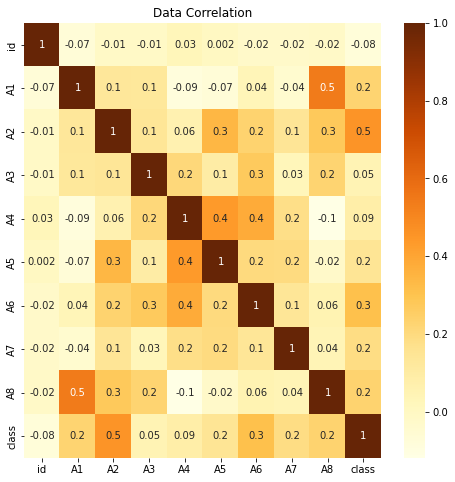

In [211]:
plt.figure(figsize=(8,8))
sns.heatmap(df_Train.corr(), annot = True, cmap = 'YlOrBr', fmt='.1g')
plt.title('Data Correlation')
plt.show()

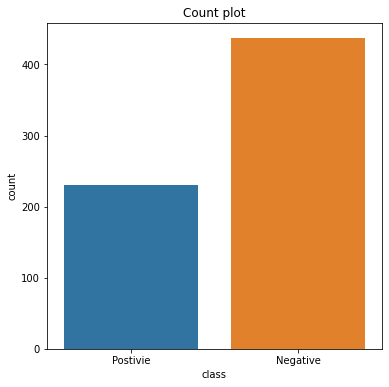

In [212]:
import warnings
warnings.filterwarnings('ignore')
CountPlot = []
CountPlot = df_Train['class']
CountPlot = CountPlot.replace(0,'Negative')
CountPlot = CountPlot.replace(1,'Postivie')

plt.figure(figsize=(6,6))
sns.countplot(CountPlot)
plt.title('Count plot')
plt.show()

In [213]:
# Removing of noise 

df_Train['A2'] = df_Train['A2'].replace(0, 140)
df_Train['A3'] = df_Train['A3'].replace(0, 60)
df_Train['A4'] = df_Train['A4'].replace(0, 8.5)
df_Train['A5'] = df_Train['A5'].replace(0, 9)
df_Train['A6'] = df_Train['A6'].replace(0, 18.5)

# Data Splitting and Model Building

In [122]:
'''

from imblearn.over_sampling import SMOTE

smote = SMOTE()
df_Train.iloc[:,0:8], df_Train['class'] =smote.fit_resample(df_Train.iloc[:,0:8], df_Train['class'])

'''

"\n\nfrom imblearn.over_sampling import SMOTE\n\nsmote = SMOTE()\ndf_Train.iloc[:,0:8], df_Train['class'] =smote.fit_resample(df_Train.iloc[:,0:8], df_Train['class'])\n\n"

In [214]:
# Splitting of data
df_Train.drop('id', axis= 1, inplace = True)
x = df_Train.iloc[:,0:8]
y = df_Train['class']


[0.10722367 0.23183386 0.09905266 0.0782581  0.07739863 0.15591316
 0.11523323 0.13508668]


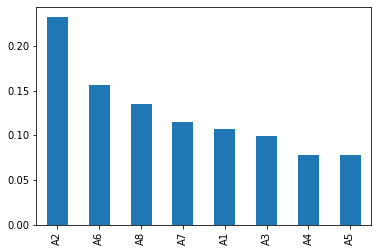

In [215]:
# Feature selection using ExtraTreesClassifier

X=df_Train.iloc[:,0:8]
Y=df_Train['class']
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot.bar()
plt.show()
list1=feat_importances.keys().to_list()

In [216]:
# Defining Early Stop method

EarlyStop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


## Model 1 
   starting with 2 nodes
   

In [217]:
# Data split for train and validation 

from sklearn.preprocessing import StandardScaler

x = df_Train.iloc[:, [1,5]]


scaler = StandardScaler()
x =  scaler.fit_transform(x)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=RANDOM_SEED)


# define the keras model
model1 = keras.Sequential()
model1.add(layers.Dense(4, input_dim=2, activation='relu'))
model1.add(layers.Dense(6, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
 dense_4 (Dense)             (None, 6)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [218]:

# Compiling the keras model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the model
m1 = model1.fit(X_train, Y_train, batch_size=20, epochs=120, 
           validation_data=(X_test, Y_test) ,  callbacks = [EarlyStop])
     
Model1_scores = model1.evaluate(X_test, Y_test, verbose=0)

print('\n')
print("Model Score: %.2f%%" % (Model1_scores[1]*100))

m1_val_accuracy = m1.history['val_accuracy'][-1] * 100
print('\n')
print("Validation Score: %.2f%%" % (m1_val_accuracy))




Epoch 1/120
24/24 [==============================] - 3s 26ms/step - loss: 0.5918 - accuracy: 0.6938 - val_loss: 0.5808 - val_accuracy: 0.6866
Epoch 2/120
24/24 [==============================] - 0s 11ms/step - loss: 0.5734 - accuracy: 0.7002 - val_loss: 0.5638 - val_accuracy: 0.7015
Epoch 3/120
24/24 [==============================] - 0s 15ms/step - loss: 0.5592 - accuracy: 0.6938 - val_loss: 0.5512 - val_accuracy: 0.7164
Epoch 4/120
24/24 [==============================] - 0s 10ms/step - loss: 0.5495 - accuracy: 0.6959 - val_loss: 0.5414 - val_accuracy: 0.7164
Epoch 5/120
24/24 [==============================] - 0s 13ms/step - loss: 0.5420 - accuracy: 0.7066 - val_loss: 0.5340 - val_accuracy: 0.7363
Epoch 6/120
24/24 [==============================] - 0s 12ms/step - loss: 0.5365 - accuracy: 0.7109 - val_loss: 0.5291 - val_accuracy: 0.7463
Epoch 7/120
24/24 [==============================] - 0s 15ms/step - loss: 0.5318 - accuracy: 0.7238 - val_loss: 0.5246 - val_accuracy: 0.7711
Epoch 

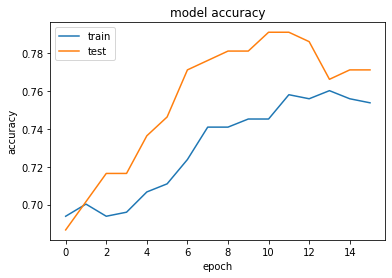

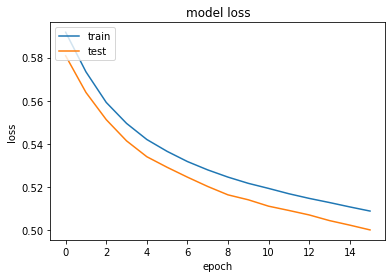

In [219]:

# summarize the history for accuracy
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(m1.history['loss'])
plt.plot(m1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
     

In [220]:
# clear session
keras.backend.clear_session()
keras.utils.set_random_seed(seed)

## Model 2
    starting with 4 nodes
    


In [221]:
# Data split for train and validation 
x = df_Train.iloc[:, [1,5,7,6]]



scaler = StandardScaler()
x =  scaler.fit_transform(x)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=RANDOM_SEED)


# define the keras model
model2 = keras.Sequential()
model2.add(layers.Dense(8, input_dim=4, activation='relu'))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [222]:

# Compiling the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the model
m2 = model2.fit(X_train, Y_train, batch_size=20, epochs=120, 
           validation_data=(X_test, Y_test) ,  callbacks = [EarlyStop])
     
Model2_scores = model2.evaluate(X_test, Y_test, verbose=0)
print('\n')
print("Accuracy: %.2f%%" % (Model2_scores[1]*100))


m2_val_accuracy = m2.history['val_accuracy'][-1] * 100
print('\n')
print("Validation Score: %.2f%%" % (m2_val_accuracy))


Epoch 1/120
24/24 [==============================] - 3s 36ms/step - loss: 0.5576 - accuracy: 0.6981 - val_loss: 0.5242 - val_accuracy: 0.8060
Epoch 2/120
24/24 [==============================] - 0s 20ms/step - loss: 0.5350 - accuracy: 0.7088 - val_loss: 0.5027 - val_accuracy: 0.8060
Epoch 3/120
24/24 [==============================] - 0s 19ms/step - loss: 0.5177 - accuracy: 0.7281 - val_loss: 0.4875 - val_accuracy: 0.8159
Epoch 4/120
24/24 [==============================] - 0s 19ms/step - loss: 0.5064 - accuracy: 0.7409 - val_loss: 0.4753 - val_accuracy: 0.8209
Epoch 5/120
24/24 [==============================] - 0s 16ms/step - loss: 0.4981 - accuracy: 0.7409 - val_loss: 0.4673 - val_accuracy: 0.8159
Epoch 6/120
24/24 [==============================] - 1s 27ms/step - loss: 0.4924 - accuracy: 0.7516 - val_loss: 0.4610 - val_accuracy: 0.8209
Epoch 7/120
24/24 [==============================] - 1s 23ms/step - loss: 0.4876 - accuracy: 0.7516 - val_loss: 0.4570 - val_accuracy: 0.8010
Epoch 

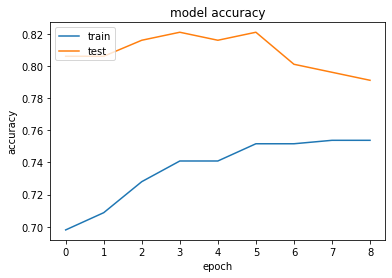

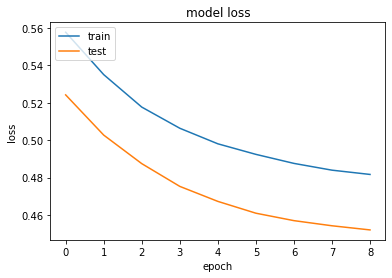

In [223]:

# summarize the history for accuracy
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(m2.history['loss'])
plt.plot(m2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
     

In [224]:

# clear session
keras.backend.clear_session()
keras.utils.set_random_seed(seed)

## Model 3
   starting with 6 nodes

In [225]:
# Data split for train and validation 
x = df_Train.iloc[:, [1,5,7,6,0,2]]

scaler = StandardScaler()
x =  scaler.fit_transform(x)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=RANDOM_SEED)


# define the keras model
model3 = keras.Sequential()
model3.add(layers.Dense(12, input_dim=6, activation='relu'))
model3.add(layers.Dense(24, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                84        
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


In [226]:

# Compiling the keras model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the model
m3 = model3.fit(X_train, Y_train, batch_size=20, epochs=120, 
           validation_data=(X_test, Y_test) ,  callbacks = [EarlyStop])
     
Model3_scores = model3.evaluate(X_test, Y_test, verbose=0)
print('\n')
print("Accuracy: %.2f%%" % (Model3_scores[1]*100))


m3_val_accuracy = m3.history['val_accuracy'][-1] * 100
print('\n')
print("Validation Score: %.2f%%" % (m3_val_accuracy))


Epoch 1/120
24/24 [==============================] - 3s 32ms/step - loss: 0.6938 - accuracy: 0.6296 - val_loss: 0.6611 - val_accuracy: 0.6766
Epoch 2/120
24/24 [==============================] - 0s 11ms/step - loss: 0.6427 - accuracy: 0.6831 - val_loss: 0.5994 - val_accuracy: 0.7164
Epoch 3/120
24/24 [==============================] - 0s 20ms/step - loss: 0.6023 - accuracy: 0.7045 - val_loss: 0.5489 - val_accuracy: 0.7861
Epoch 4/120
24/24 [==============================] - 0s 17ms/step - loss: 0.5704 - accuracy: 0.7281 - val_loss: 0.5051 - val_accuracy: 0.8010
Epoch 5/120
24/24 [==============================] - 0s 13ms/step - loss: 0.5422 - accuracy: 0.7302 - val_loss: 0.4731 - val_accuracy: 0.8109
Epoch 6/120
24/24 [==============================] - 0s 12ms/step - loss: 0.5199 - accuracy: 0.7430 - val_loss: 0.4505 - val_accuracy: 0.8060
Epoch 7/120
24/24 [==============================] - 0s 11ms/step - loss: 0.5027 - accuracy: 0.7516 - val_loss: 0.4365 - val_accuracy: 0.8109
Epoch 

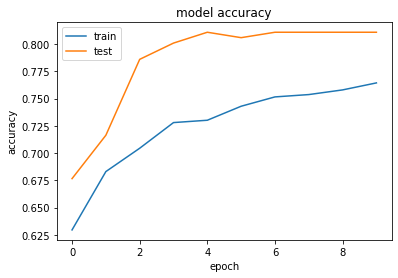

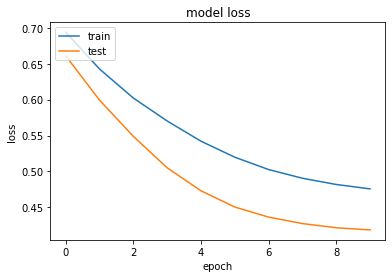

In [227]:

# summarize the history for accuracy
plt.plot(m3.history['accuracy'])
plt.plot(m3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(m3.history['loss'])
plt.plot(m3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
     

In [228]:

# clear session
keras.backend.clear_session()
keras.utils.set_random_seed(seed)

## Model 4
   starting with 8 nodes

In [229]:
# Data split for train and validation 


x = df_Train.iloc[:, 0:8]

scaler = StandardScaler()
x =  scaler.fit_transform(x)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=RANDOM_SEED)


# define the keras model
model4 = keras.Sequential()
model4.add(layers.Dense(16, input_dim=8, activation='relu'))
model4.add(layers.Dense(32, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [230]:

# Compiling the keras model
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the model
m4 = model4.fit(X_train, Y_train, batch_size=20, epochs=120, 
           validation_data=(X_test, Y_test) ,  callbacks = [EarlyStop])
     
Model4_scores = model4.evaluate(X_test, Y_test, verbose=0)
print('\n')
print("Accuracy: %.2f%%" % (Model4_scores[1]*100))


m4_val_accuracy = m1.history['val_accuracy'][-1] * 100
print('\n')
print("Validation Score: %.2f%%" % (m4_val_accuracy))


Epoch 1/120
24/24 [==============================] - 4s 47ms/step - loss: 0.5986 - accuracy: 0.6916 - val_loss: 0.5571 - val_accuracy: 0.7214
Epoch 2/120
24/24 [==============================] - 0s 14ms/step - loss: 0.5416 - accuracy: 0.7366 - val_loss: 0.5139 - val_accuracy: 0.7662
Epoch 3/120
24/24 [==============================] - 0s 11ms/step - loss: 0.5091 - accuracy: 0.7602 - val_loss: 0.4888 - val_accuracy: 0.7761
Epoch 4/120
24/24 [==============================] - 0s 15ms/step - loss: 0.4904 - accuracy: 0.7687 - val_loss: 0.4734 - val_accuracy: 0.7861
Epoch 5/120
24/24 [==============================] - 0s 16ms/step - loss: 0.4784 - accuracy: 0.7687 - val_loss: 0.4647 - val_accuracy: 0.7861
Epoch 6/120
24/24 [==============================] - 0s 17ms/step - loss: 0.4688 - accuracy: 0.7752 - val_loss: 0.4602 - val_accuracy: 0.7761
Epoch 7/120
24/24 [==============================] - 0s 10ms/step - loss: 0.4602 - accuracy: 0.7837 - val_loss: 0.4595 - val_accuracy: 0.7811
Epoch 

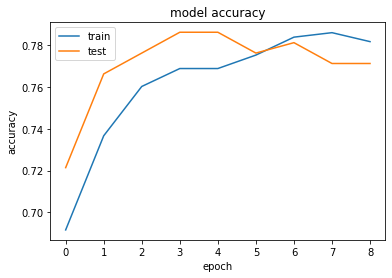

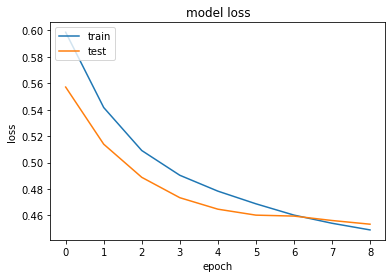

In [231]:

# summarize the history for accuracy
plt.plot(m4.history['accuracy'])
plt.plot(m4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(m4.history['loss'])
plt.plot(m4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
     

In [232]:

# clear session
keras.backend.clear_session()
keras.utils.set_random_seed(seed)

##  Model Score & Accuracy

In [233]:
# Checking all the model accuracy

print('All Model Score')
print('\n')

print('|-----------------|')
print(f'|Model  |Score    |')
print('|-----------------|')
print(f'| M1    |{Model1_scores[1] * 100 :.2f}    |')
print(f'| M2    |{Model2_scores[1] * 100 :.2f}    |')
print(f'| M3    |{Model3_scores[1] * 100 :.2f}    |')
print(f'| M4    |{Model4_scores[1] * 100 :.2f}    |')
print('|-----------------|')

print('\n')

# Checking all the model accuracy

print('All Model Accuracy')
print('\n')

print('|-----------------|')
print(f'|Model  |Accuracy |')
print('|-----------------|')
print(f'| M1    |{m1_val_accuracy:.2f}    |')
print(f'| M2    |{m2_val_accuracy:.2f}    |')
print(f'| M3    |{m3_val_accuracy:.2f}    |')
print(f'| M4    |{m4_val_accuracy:.2f}    |')
print('|-----------------|')

All Model Score


|-----------------|
|Model  |Score    |
|-----------------|
| M1    |79.10    |
| M2    |82.09    |
| M3    |81.09    |
| M4    |78.61    |
|-----------------|


All Model Accuracy


|-----------------|
|Model  |Accuracy |
|-----------------|
| M1    |77.11    |
| M2    |79.10    |
| M3    |81.09    |
| M4    |77.11    |
|-----------------|


## Hyper Tuning using Keras tuner

In [295]:
from IPython.display import display
# define a callback to clear the training outputs at the end of every training step
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [304]:
# build the model within a function
# Apply hyperparmeter tuning to the number of units in the second hidden layer in the model
def model_builder1(hp):
  Hyper_model = keras.Sequential()
  Hyper_model.add(layers.Dense(input_dim=8, units=10, activation='relu'))
  hp_units = hp.Int('units', min_value = 8, max_value = 60, step = 10)
  Hyper_model.add(layers.Dense(units=hp_units, activation='relu'))
  Hyper_model.add(layers.Dense(units=1, activation='sigmoid'))
  Hyper_model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])
  return Hyper_model
     

In [305]:
# instatiate the tuner and perform hypertuning
tuner = kt.Hyperband(model_builder1,
                     objective = 'val_accuracy', 
                     max_epochs = 150,
                     factor = 3,        # factor is a number that determines how many models are created to run in parallel whaen testing the hyperparameters
                     directory = 'my_dir',  # directory that the tuned hyperparameter results are stored in (change the name of this directory if you get the message INFO:tensorflow:Oracle triggered exit)
                     project_name = 'intro_to_kt1') 

In [306]:
import IPython

x = df_Train.iloc[:, 0:8]



X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=RANDOM_SEED)


In [307]:
t = tuner.search(X_train, Y_train, epochs = 100, validation_data = (X_test, Y_test),
             callbacks = [ClearTrainingOutput()])

Trial 254 Complete [00h 00m 43s]
val_accuracy: 0.7512437701225281

Best val_accuracy So Far: 0.7810945510864258
Total elapsed time: 00h 23m 56s


In [308]:

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)
     

{'units': 38, 'tuner/epochs': 150, 'tuner/initial_epoch': 50, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0240'}


In [309]:

# apply the optimal hyperparameters to the model and print the summary
Hyper_model = tuner.hypermodel.build(best_hps)
Hyper_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                90        
                                                                 
 dense_4 (Dense)             (None, 38)                418       
                                                                 
 dense_5 (Dense)             (None, 1)                 39        
                                                                 
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


In [312]:

# retrain the model with the optimum hyperparameters and train it on the data
HyperTune = Hyper_model.fit(X_train, Y_train, epochs = 200, 
                            validation_data = (X_test, Y_test))
HyperTune_scores = Hyper_model.evaluate(X_test, Y_test, verbose=0)
print('\n')
print("Accuracy: %.2f%%" % (HyperTune_scores[1]*100))


HyperTune_val_accuracy = HyperTune.history['val_accuracy'][-1] * 100
print('\n')
print("Validation Score: %.2f%%" % (HyperTune_val_accuracy))

Epoch 1/200
15/15 [==============================] - 1s 37ms/step - loss: 0.6159 - accuracy: 0.7045 - val_loss: 0.7497 - val_accuracy: 0.6169
Epoch 2/200
15/15 [==============================] - 0s 17ms/step - loss: 0.5382 - accuracy: 0.7409 - val_loss: 0.6023 - val_accuracy: 0.6567
Epoch 3/200
15/15 [==============================] - 0s 15ms/step - loss: 0.5089 - accuracy: 0.7345 - val_loss: 0.5584 - val_accuracy: 0.7264
Epoch 4/200
15/15 [==============================] - 0s 13ms/step - loss: 0.4912 - accuracy: 0.7687 - val_loss: 0.5627 - val_accuracy: 0.6816
Epoch 5/200
15/15 [==============================] - 0s 18ms/step - loss: 0.5157 - accuracy: 0.7302 - val_loss: 0.5553 - val_accuracy: 0.7164
Epoch 6/200
15/15 [==============================] - 0s 15ms/step - loss: 0.5670 - accuracy: 0.7216 - val_loss: 0.6229 - val_accuracy: 0.6567
Epoch 7/200
15/15 [==============================] - 0s 16ms/step - loss: 0.5275 - accuracy: 0.7430 - val_loss: 0.5582 - val_accuracy: 0.7015
Epoch 

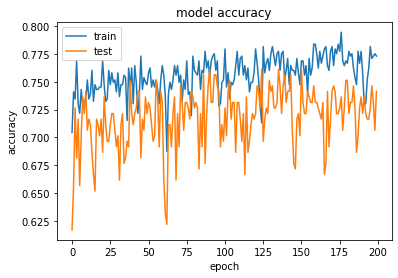

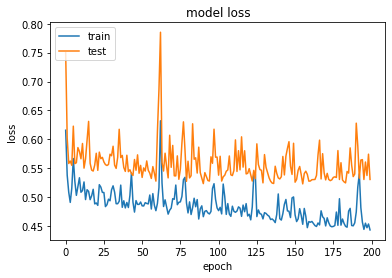

In [313]:

# summarize the history for accuracy
plt.plot(HyperTune.history['accuracy'])
plt.plot(HyperTune.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(HyperTune.history['loss'])
plt.plot(HyperTune.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
     

## Hyper tuning using GridSearchCV


In [315]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [316]:
from sklearn.preprocessing import StandardScaler

# Data split for train and validation 
x = df_Train.iloc[:, [1,5,7,6,0,2]]


scaler = StandardScaler()
x =  scaler.fit_transform(x)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=RANDOM_SEED)



model1.summary()
def build_clf(unit):
  # creating the layers of the NN
  ann = keras.Sequential()
  ann.add(layers.Dense(12, input_dim=6, activation='relu'))
  ann.add(layers.Dense(units=unit, activation='relu'))
  ann.add(layers.Dense(units=1, activation='sigmoid'))
  ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return ann

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
 dense_4 (Dense)             (None, 6)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [317]:

Gridmodel=KerasClassifier(build_fn=build_clf)

In [ ]:
params={'batch_size':[10,15,20,25], 
        'nb_epoch':[100, 125, 150, 200],
        'unit':[18,24],
           
        }
gs=GridSearchCV(estimator=Gridmodel, param_grid=params, cv=10)
# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(x, y)


4/4 [==============================] - 0s 6ms/step - loss: 0.5919 - accuracy: 0.7015


In [ ]:

best_params=gs.best_params_
accuracy=gs.best_score_

print(best_params)
print(accuracy)

# Prediction of Test Dataset


In [234]:
# Loading of Test Dataset and displaying the first 5 rows

df_Test = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/Diabetes_Prediction_Using_Neural_Network/main/data/test.csv')
df_Test.head(5)

,id,A1,A2,A3,A4,A5,A6,A7,A8
0,1,6,98,58,33,190,34.0,0.430,43
1,2,9,154,78,30,100,30.9,0.164,45
2,3,6,165,68,26,168,33.6,0.631,49
3,4,1,99,58,10,0,25.4,0.551,21
4,5,10,68,106,23,49,35.5,0.285,47


In [235]:
m2_predict = df_Test.copy()
m2_predict.drop(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'], axis = 1, inplace = True  )
df_Test.drop('id', axis = 1, inplace = True)

In [550]:
predict = model3.predict(df_Test.iloc[:, [1,5,7,6]])


4/4 [==============================] - 1s 7ms/step


In [551]:
m3_predict['prediction'] = [1 if pred > 0.5 else 0 for pred in predict]
print(m3_predict['prediction'])

0     0
1     1
2     1
3     0
4     0
     ..
95    0
96    0
97    0
98    1
99    0
Name: prediction, Length: 100, dtype: int64


In [552]:
m3_predict.head(5)

,id,prediction
0,1,0
1,2,1
2,3,1
3,4,0
4,5,0


In [480]:
# To convert the prediction values into Json file

data = []
for index, row in df_Test.iterrows():
    data.append({'id': int(row['id']), 'prediction': int(row['prediction'])})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))

KeyError: ignored

# Cross validation

In [237]:
x = df_Train.iloc[:,  [1,5,7,6,0,2]]
scaler = StandardScaler()
x =  scaler.fit_transform(x)


predict_Test = model3.predict(x)


21/21 [==============================] - 0s 3ms/step


In [238]:
test = [1 if pred > 0.5 else 0 for pred in predict_Test]
print(test)

[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [239]:
test1 = df_Train['class']
test1[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: class, dtype: int64

In [240]:
test[0:10]

[1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

In [241]:

from math import sqrt
from sklearn.metrics import mean_squared_error

 
MSE = np.square(np.subtract(test1,test)).mean() 
 
RMSE = sqrt(MSE)
print(MSE, RMSE)

0.23802395209580837 0.48787698459325624


In [242]:
from sklearn.metrics import accuracy_score
accuracy_score(test1,test) 

0.7619760479041916